<a href="https://colab.research.google.com/github/mariajmolina/UMDAOSC650/blob/main/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data exploration, preprocessing, labels, and dimensionality reduction

In this notebook, we will be exploring a dummy dataset and demonstrating ways we can preprocess our data, add labels, and perform dimensionality reduction.

First, we will import our python libraries.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

Next, we will create some toy weather data to explore.

Adapted from https://docs.xarray.dev/en/latest/examples/weather-data.html

In [ ]:
# set a random seed for reproducibility
np.random.seed(123)

# create a fake time array and annual cycle
times = pd.date_range("2000-01-01", "2005-12-31", name="time")
annual_cycle = np.sin(2 * np.pi * (times.dayofyear.values / 365.25 - 0.28))
base = 10 + 15 * annual_cycle.reshape(-1, 1)

# create the maximum and minimum temperature arrays for the dummy data
tmin_values = base + 3 * np.random.randn(annual_cycle.size, 3)
tmax_values = base + 10 + 3 * np.random.randn(annual_cycle.size, 3)

In [ ]:
# organize our data into an xarray dataset
ds = xr.Dataset(
    {
        "tmin": (("time", "location"), tmin_values),
        "tmax": (("time", "location"), tmax_values),
    },
    {"time": times, "location": ["IA", "IN", "IL"]},
)

In [ ]:
# let's check out what the dataset looks like
ds

<xarray.Dataset> Size: 123kB
Dimensions:   (time: 2192, location: 3)
Coordinates:
  * time      (time) datetime64[ns] 18kB 2000-01-01 2000-01-02 ... 2005-12-31
  * location  (location) <U2 24B 'IA' 'IN' 'IL'
Data variables:
    tmin      (time, location) float64 53kB -8.037 -1.788 ... -0.04978 -5.016
    tmax      (time, location) float64 53kB 4.307 7.471 6.975 ... 0.5702 -2.562

In [ ]:
# we can select a location using the location string
ds.sel(location="IN")

<xarray.Dataset> Size: 53kB
Dimensions:   (time: 2192)
Coordinates:
  * time      (time) datetime64[ns] 18kB 2000-01-01 2000-01-02 ... 2005-12-31
    location  <U2 8B 'IN'
Data variables:
    tmin      (time) float64 18kB -1.788 -6.558 -6.146 ... -5.712 -0.04978
    tmax      (time) float64 18kB 7.471 8.415 4.359 7.562 ... 1.274 6.309 0.5702

In [ ]:
# if we prefer a pandas dataframe, we can easily convert
df = ds.to_dataframe()
df.head() # few first few rows

tmin      tmax
time       location                    
2000-01-01 IA       -8.037369  4.307278
           IN       -1.788441  7.471097
           IL       -3.931542  6.975172
2000-01-02 IA       -9.341157  0.269988
           IN       -6.558073  8.414573

# Data exploration section

In [ ]:
# lets view some simple statistics of tmin for each location
# we can group by location to more easily generate the stats
df['tmin'].groupby('location').describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
IA,2192.0,10.090275,10.983128,-13.506234,-0.048902,10.005512,20.129497,32.087925
IL,2192.0,10.014051,10.976044,-13.306257,-0.015989,9.927050,20.135186,33.302508
IN,2192.0,10.048070,10.970363,-13.395763,0.047243,10.051561,20.022142,33.456060


In [ ]:
# now create simple stats for the tmax of each location
df['tmax'].groupby('location').describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
IA,2192.0,20.032035,11.070360,-2.518939,9.727204,20.159604,30.185495,44.799206
IL,2192.0,20.021919,11.104833,-3.547442,10.115834,19.868200,30.332708,43.207552
IN,2192.0,20.066633,11.029955,-4.670116,9.656586,20.418327,30.248937,46.915897


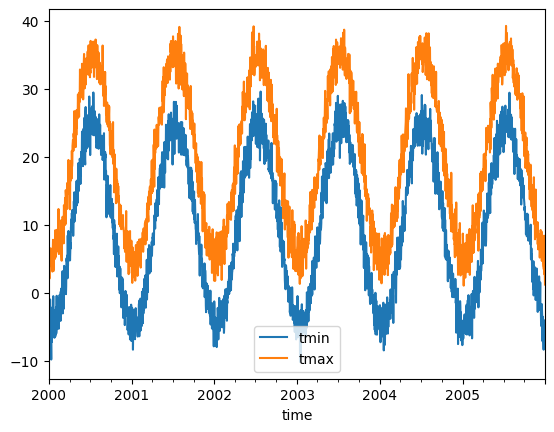

In [ ]:
# lets take the mean of all locations and plot the time series
ds.mean(dim="location").to_dataframe().plot()
plt.show()

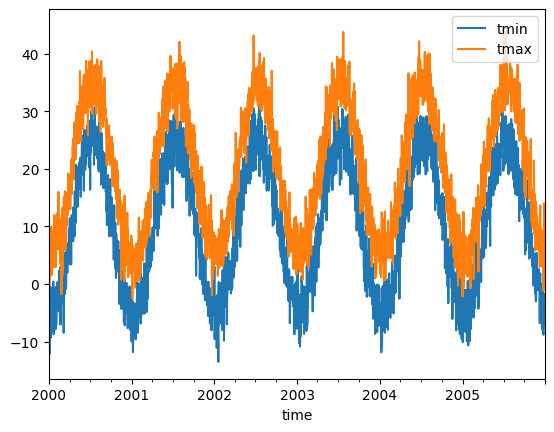

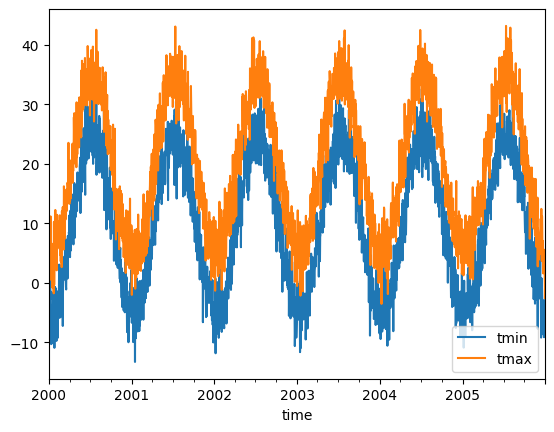

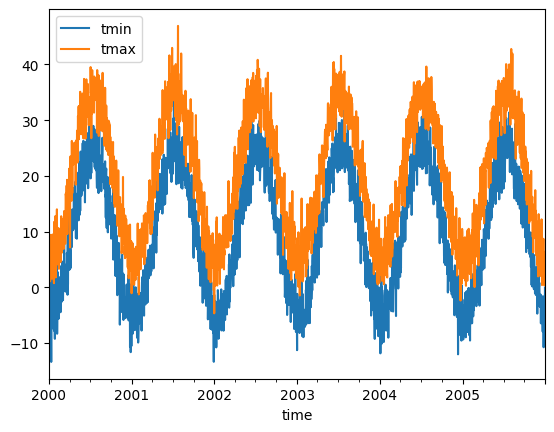

In [ ]:
# we can also plot the time series for each location
ds.sel(location='IA').to_dataframe().plot()
plt.show()

ds.sel(location='IL').to_dataframe().plot()
plt.show()

ds.sel(location='IN').to_dataframe().plot()
plt.show()

<Axes: ylabel='Frequency'>

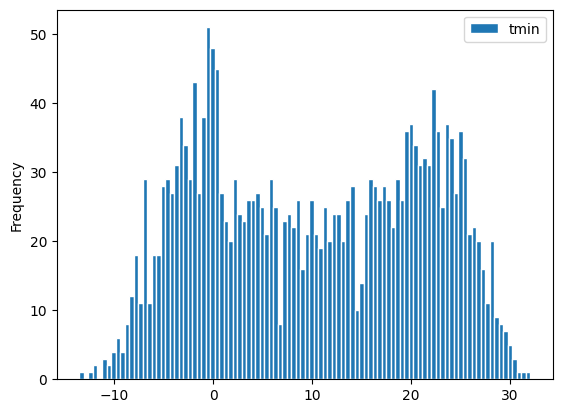

In [ ]:
# we may be interested in the number of times certain
# temperatures occur, which we can view with a histogram
# here we are viewing this just for Iowa and tmin
ds.sel(location='IA')['tmin'].to_dataframe().plot.hist(
    edgecolor='w', bins=100)

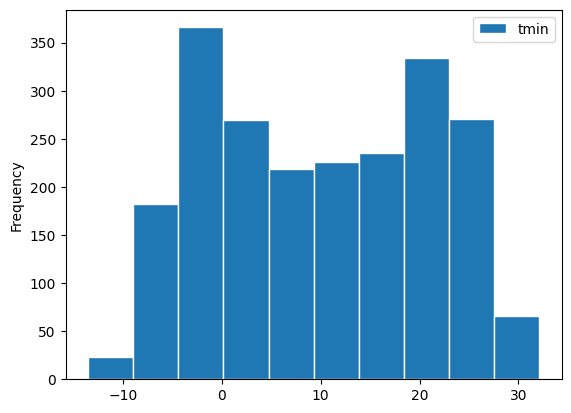

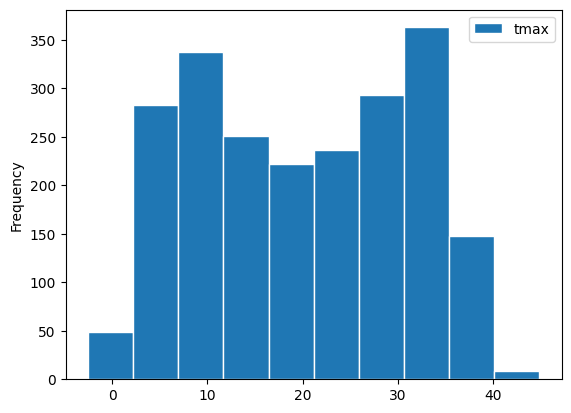

In [ ]:
# the number of bins can be modified too
# Iowa's tmin
ds.sel(location='IA')['tmin'].to_dataframe().plot.hist(
    edgecolor='w', bins=10)
plt.show()
# Iowa's tmax
ds.sel(location='IA')['tmax'].to_dataframe().plot.hist(
    edgecolor='w', bins=10)
plt.show()

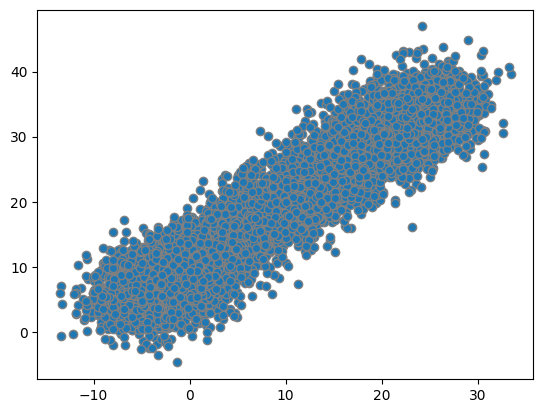

In [ ]:
# we can also view how tmin and tmax are related using a scatterplot
plt.scatter(ds['tmin'], ds['tmax'], edgecolor='grey')
plt.show()

In [ ]:
# probability of a freeze by calendar month
freeze = (ds["tmin"] <= 0).groupby("time.month").mean("time")
freeze

<xarray.DataArray 'tmin' (month: 12, location: 3)> Size: 288B
array([[0.93548387, 0.93548387, 0.90860215],
       [0.77647059, 0.77647059, 0.81764706],
       [0.19892473, 0.16666667, 0.16129032],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.01612903, 0.01075269, 0.00537634],
       [0.28333333, 0.3       , 0.29444444],
       [0.84946237, 0.82258065, 0.84408602]])
Coordinates:
  * location  (location) <U2 24B 'IA' 'IN' 'IL'
  * month     (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

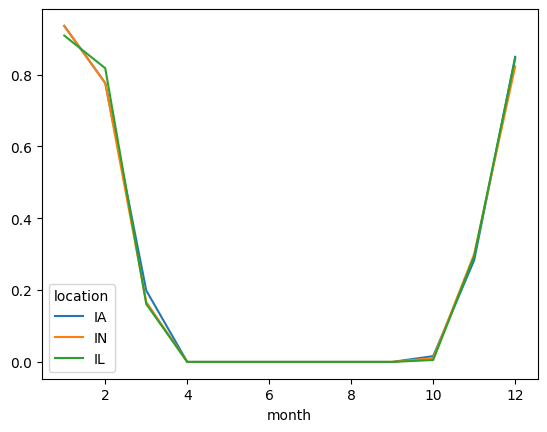

In [ ]:
# quick visualization
freeze.to_pandas().plot(); plt.show()

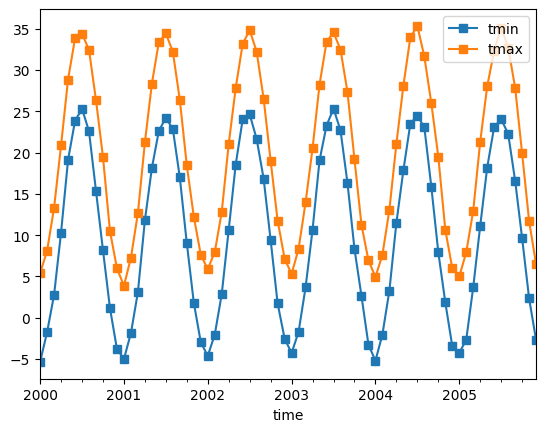

In [ ]:
# monthly means
# we can resample a time dimension to be monthly (1MS) average
monthly_avg = ds.resample(time="1MS").mean()
# plot the variables for Iowa
monthly_avg.sel(location="IA").to_dataframe().plot(style="s-")
plt.show()

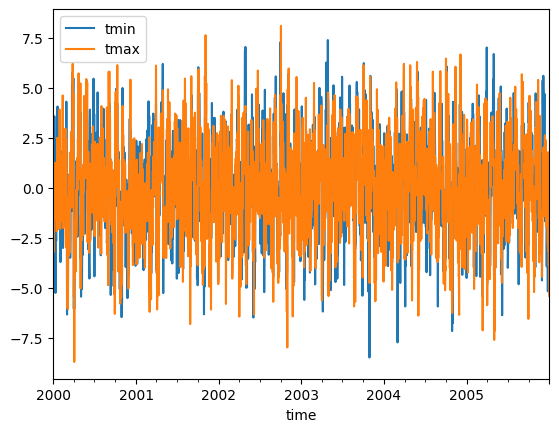

In [ ]:
# calculate monthly anomalies
climatology = ds.groupby("time.month").mean("time")
anomalies = ds.groupby("time.month") - climatology
anomalies.mean("location").to_dataframe()[["tmin", "tmax"]].plot()
plt.show()

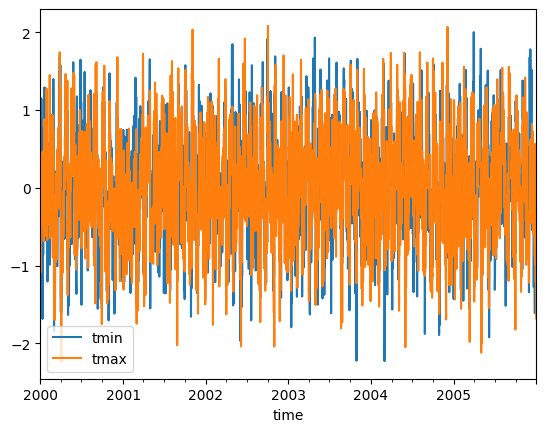

In [ ]:
# we can calculate standardized anomalies
climatology_mean = ds.groupby("time.month").mean("time")
climatology_std = ds.groupby("time.month").std("time")
stand_anomalies = xr.apply_ufunc(
    lambda x, m, s: (x - m) / s,
    ds.groupby("time.month"),
    climatology_mean,
    climatology_std,
)

stand_anomalies.mean("location").to_dataframe()[["tmin", "tmax"]].plot()
plt.show()

In [ ]:
stand_anomalies

<xarray.Dataset> Size: 140kB
Dimensions:   (time: 2192, location: 3)
Coordinates:
  * time      (time) datetime64[ns] 18kB 2000-01-01 2000-01-02 ... 2005-12-31
  * location  (location) <U2 24B 'IA' 'IN' 'IL'
    month     (time) int64 18kB 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12
Data variables:
    tmin      (time, location) float64 53kB -1.025 0.8885 ... 0.9589 -0.5782
    tmax      (time, location) float64 53kB -0.2732 0.6729 ... -1.772 -2.917

In [ ]:
# we can visualize correlations between locations
correlation_matrix = np.corrcoef(stand_anomalies['tmax'].transpose('location','time'))
correlation_matrix

array([[1.        , 0.18154861, 0.20928759],
       [0.18154861, 1.        , 0.23578394],
       [0.20928759, 0.23578394, 1.        ]])

In [ ]:
from scipy.stats import pearsonr
pearsonr(stand_anomalies['tmax'].isel(location=0), stand_anomalies['tmax'].isel(location=1))

PearsonRResult(statistic=0.18154861474897227, pvalue=1.0684505560033999e-17)

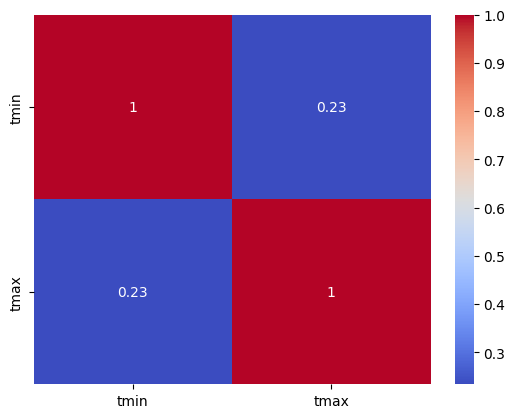

In [ ]:
import seaborn as sns
# Calculate the correlation matrix
corr = stand_anomalies.drop_vars('month').to_dataframe().corr()

# Create the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

For more details on feature selection, see: https://scikit-learn.org/stable/modules/feature_selection.html

# Dimensionality reduction with principal component analysis

In [ ]:
from sklearn.decomposition import PCA

**What is PCA?**

"Principal component analysis (PCA) is a mathematical algorithm that reduces the dimensionality of the data while retaining most of the variation in the data set. It accomplishes this reduction by identifying directions, called principal components, along which the variation in the data is maximal. By using a few components, each sample can be represented by relatively few numbers instead of by values for thousands of variables. Samples can then be plotted, making it possible to visually assess similarities and differences between samples and determine whether samples can be grouped." Sourced from https://www.nature.com/articles/nbt0308-303

We will perform dimensionality reduction in this case by representing our three cities using just two values (rather than three).

In [ ]:
# initialize object
pca = PCA(n_components=2)

In [ ]:
# fit the pca object to the data (tmax in this case)
pca.fit(stand_anomalies['tmax'].values)
# and now transform the arrays of interest
X = pca.transform(stand_anomalies['tmax'].values)

In [ ]:
# we have modified the arrays from
print(stand_anomalies['tmax'].values.shape)
# to have a shape now of
print(X.shape)

(2192, 3)
(2192, 2)


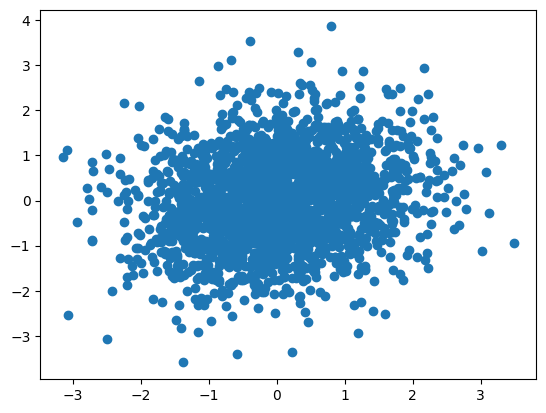

In [ ]:
# lets visualize the two pcs/transformed arrays
# first lets view the original data (first two dimensions/states)
plt.scatter(stand_anomalies['tmax'][:,0],stand_anomalies['tmax'][:,1])
plt.show()

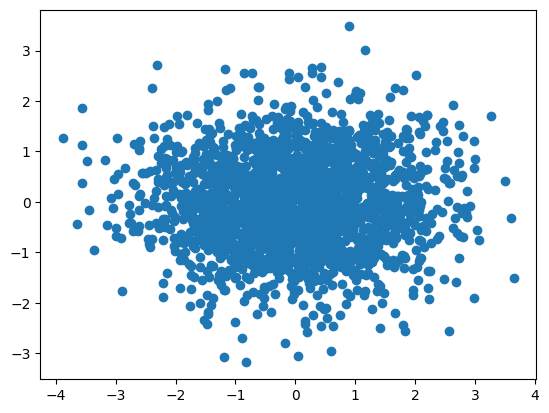

In [ ]:
# and now the transformed data
plt.scatter(X[:,0], X[:,1])
plt.show()

In [ ]:
# what is the varianced explained by these two pcs?
print(pca.explained_variance_ratio_)

[0.4728429  0.27401653]


Other dimensionality reduction can also be feature selection and feature extraction. See https://scikit-learn.org/stable/modules/feature_selection.html for examples

# Inputs and Labels section

When using various input variables (i.e., features or channels), normalizing or standardizing the variables is needed to make sure they have a similar dynamic range. Otherwise, some input variables may have much larger magnitudes than other input variables, limiting their contributions to the learning process. By normalizing/standardizing our features, we facilitate meaningful comparisons between features. This practice can also improve machine learning model convergence.

Standardization involves centering the respective data to have a mean of zero and a standard deviation of one, which can be achieved by subtracting the mean and dividing by the standard deviation (i.e., z-score). Normalization involves the scaling of data to a set range, such as from 0 to +1 or -1 to +1, by using the minimum and maximum values of the respective variable.

Here we have some helper functions for normalizing and standardizing our data using numpy.

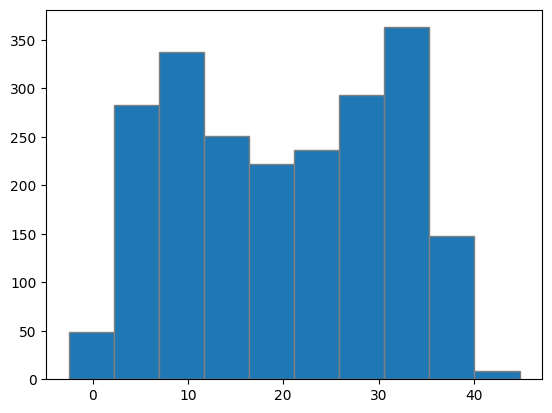

In [ ]:
freq = plt.hist(ds['tmax'].isel(location=0), edgecolor='grey')
plt.show()

In [ ]:
# matplotlib bins things for us nicely!
# we can see these values... what is the frequency per bin?
print(freq[0])
# what is the range of the bins?
print(freq[1])

[ 49. 283. 338. 251. 222. 236. 293. 363. 148.   9.]
[-2.51893907  2.21287543  6.94468992 11.67650441 16.4083189  21.14013339
 25.87194788 30.60376237 35.33557686 40.06739135 44.79920585]


Let's create some helper functions to rescale our data.

In [ ]:
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import gaussian_kde, linregress, pearsonr

# z-score
# the function applied to the training data needs to return the
# mean and std values
def z_score(da):
    """
    Compute z-score for training data.
    Normalizing data for ML model training.
    Args: da (array): Array of training variable.
    """
    return (da - np.mean(da)) / np.std(da), np.mean(da), np.std(da)

# when applied to test data, input the mean and std from training set
def z_score_test(da, mn, std):
    """
    Compute z-score for training data.
    Normalizing data for ML model training.
    Args: da (array): Array of training variable.
    """
    return (da - mn) / std

# the function applied to the training data needs to return the
# min and max values
def min_max_scale(da):
    """
    Scale training data by minimum and maximum values.
    Args: da (array): Array of training variable.
    """
    return (da - np.min(da)) / (
        np.max(da) - np.min(da)), np.min(da), np.max(da)

# when applied to test data, input the min and max from training set
def min_max_scale_test(da, min, max):
    """
    Scale training data by minimum and maximum values.
    Args: da (array): Array of training variable.
    """
    return (da - min) / (max - min)

def boxcox_transform(y, lam):
    """
    Apply the boxcox transformation to a 1D array.

    Parameters:
    - y: Input array (1D)
    - lam: Lambda parameter
    """
    if lam == 0:
        return np.log(y)
    else:
        return (y**lam - 1) / lam

def yeo_johnson_transform(y, lam):
    """
    Apply the Yeo-Johnson transformation to a 1D array.

    Parameters:
    - y: Input array (1D)
    - lam: Lambda parameter
    """
    y_transformed = np.zeros_like(y, dtype=np.float64)

    # Case 1: y >= 0, lambda != 0
    pos = (y >= 0) & (lam != 0)
    y_transformed[pos] = ((y[pos] + 1)**lam - 1) / lam

    # Case 2: y >= 0, lambda == 0
    pos_zero = (y >= 0) & (lam == 0)
    y_transformed[pos_zero] = np.log(y[pos_zero] + 1)

    # Case 3: y < 0, lambda != 2
    neg = (y < 0) & (lam != 2)
    y_transformed[neg] = -((-y[neg] + 1)**(2 - lam) - 1) / (2 - lam)

    # Case 4: y < 0, lambda == 2
    neg_two = (y < 0) & (lam == 2)
    y_transformed[neg_two] = -np.log(-y[neg_two] + 1)

    return y_transformed

def compute_kde(data):
    """
    Compute kernel density estimation
    """
    if type(data)==xr.core.dataarray.DataArray:
        data = data.values
    kde = gaussian_kde(data)
    x = np.linspace(min(data), max(data), 1000)  # Generate x values for the curve
    return x, kde(x)

def detrend(arr, time_array, deg=1):
    """
    Detrend a 1D array or grouped data by removing a polynomial trend.
    """
    x = time_array
    coeffs = np.polyfit(x, arr, deg=deg) # Fit the polynomial
    trend = np.polyval(coeffs, x) # Generalized trend calculation
    return arr - trend

def compute_rolling_mean(group, window=30):
    # Apply rolling mean to the grouped data
    # assumes time dimension is named 'datetime' (edit as needed)
    rolling_mean = group.rolling(datetime=window, min_periods=1, center=True).mean(skipna=True)
    return rolling_mean

def rolling_month(group):
    return group.rolling(datetime=30, min_periods=1, center=True).mean(skipna=True)

def month_year_create(yr_array):
    # helper function for creating tiled data
    return yr_array + np.tile(np.arange(0.,1.,1/12), len(np.unique(yr_array)))[:yr_array.shape[0]]

def percent_diff(mean1, mean2):
    # computing percent difference between two average values
    return ((mean1 - mean2) / mean2) * 100

In [ ]:
# apply zscore to first location's tmax
zscore, mn, std = z_score(ds['tmax'].isel(location=0))
print(mn.values, std.values)

20.211218503369558 10.986009532508573


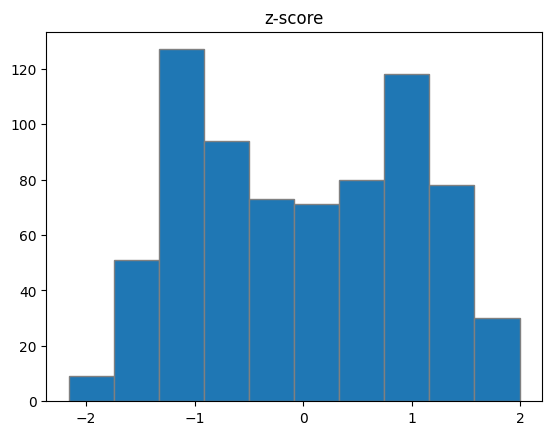

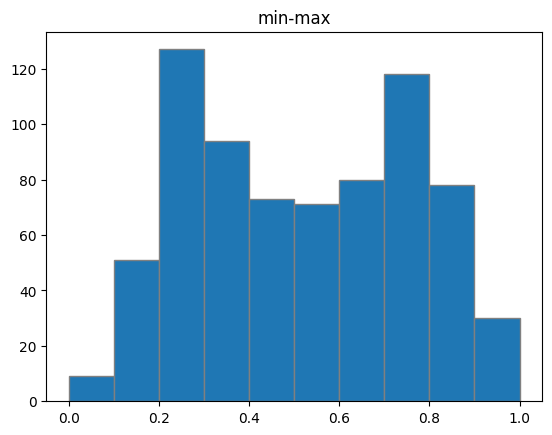

In [ ]:
# notice that the rescaling just modifies the x-axis values
plt.hist(z_score(ds['tmax'].isel(location=0))[0], edgecolor='grey')
plt.title('z-score')
plt.show()

plt.hist(min_max_scale(ds['tmax'].isel(location=0))[0], edgecolor='grey')
plt.title('min-max')
plt.show()

As we can see on the x-axis in the above images, z-score results in our data having a mean of zero while min-max results in our data spanning values from 0 to +1, with both methods not changing the actual distribution of our data.

Note that sklearn has handy functions for rescaling data, which saves the min/max and mean/std values as object attributes.

*   https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
*   https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html





### Train and test data splitting

To split our data into train and test sets, we can use random splits or split by years (or some other existing data dimension that reduces the chances of there being autocorrelation in our train/test sets).

**Note that we would need to split our train/test datasets before rescaling it.**

In [ ]:
# helper function for random split
def random_split(data, label, split=0.3, seed=0):
    """
    Help splitting data randomly for training and testing.
    """
    np.random.seed(seed)
    da_indx = np.random.permutation(data.shape[0])
    data  = data[da_indx.astype(int)]
    label = label[da_indx.astype(int)]
    init_range = int(data.shape[0] * (1 - 0.3))
    return (
        data[:init_range], label[:init_range],
        data[init_range:], label[init_range:]
        )

In [ ]:
train_X, train_Y, test_X, test_Y = random_split(
    ds['tmin'].isel(location=0),
    ds['tmax'].isel(location=0), split=0.3, seed=0)

In [ ]:
print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

(511,) (511,)
(220,) (220,)


Note that sklearn has helper functions for this preprocessing too!

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

### Label preprocessing

Lastly, what if we want to convert our continuous temperature data into discrete classes? We can use integer encoding or one-hot encoding for this.

The pandas `cut` method can be leveraged to convert continuous data to discrete classes. Make sure to supply the `labels` attribute so `pd.cut` returns encoded classes.

Of course, sklearn has functions to help us with encoding data into classes too.

*   https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder
*   https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html#sklearn.preprocessing.LabelBinarizer



In [ ]:
# lets convert our tmax into 10 classes
sample_array = ds['tmax'].isel(location=0).values
sample_cut, sample_bins = pd.cut(
    sample_array, bins=10, labels=range(0,10), retbins=True)

In [ ]:
# pd cut outputs our continuous array encoded with integer classes
sample_cut

[3, 0, 1, 1, 0, ..., 2, 1, 2, 2, 2]
Length: 731
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [ ]:
# here are the left side of the bins
sample_bins

array([-3.55182814,  1.05318194,  5.61259786, 10.17201378, 14.7314297 ,
       19.29084562, 23.85026154, 28.40967746, 32.96909338, 37.5285093 ,
       42.08792523])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# create the object
onehotencode = OneHotEncoder()

In [ ]:
# reshape the input array to be (samples, features)
sample_onehot = onehotencode.fit_transform(X=sample_cut.reshape(-1,1))

In [ ]:
sample_onehot.toarray().shape

(731, 10)

In [ ]:
sample_onehot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
sample_cut

[3, 0, 1, 1, 0, ..., 2, 1, 2, 2, 2]
Length: 731
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]